# 绘制散度图

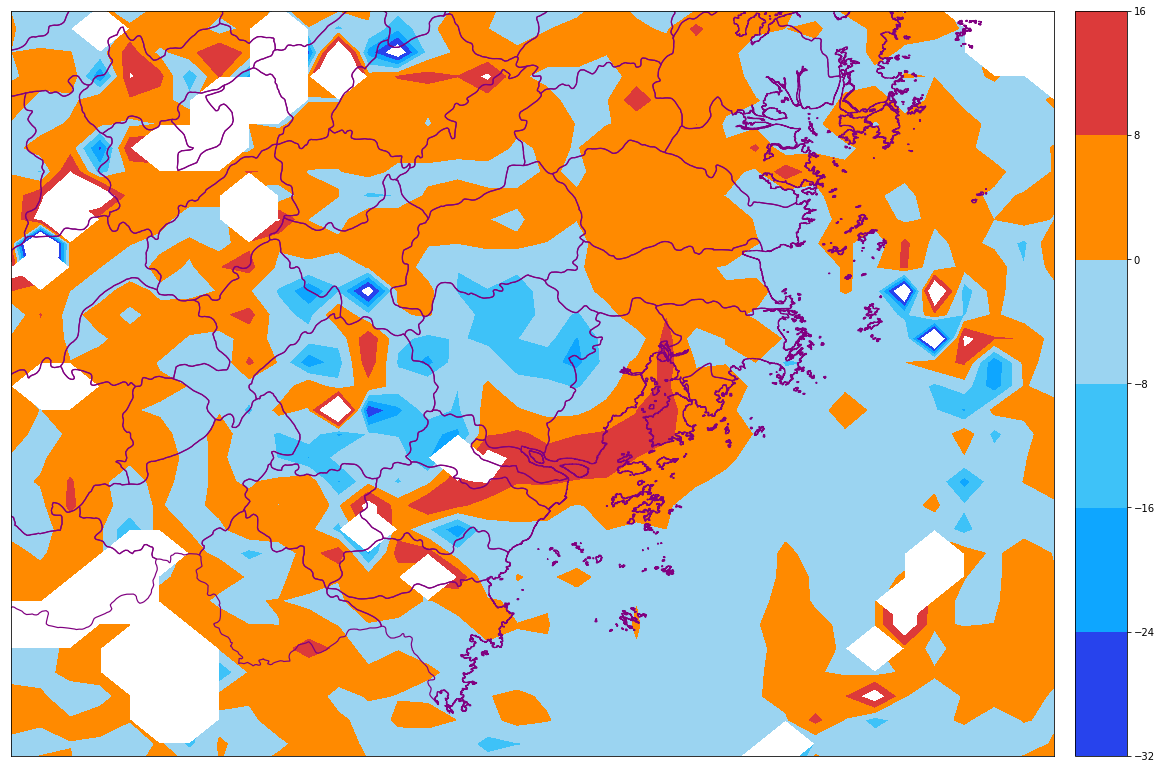

In [18]:
# 局地地形的
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import netCDF4 

from ncmaps import Cmaps

from matplotlib import cm
from ncmaps import Cmaps
from cartopy.feature import ShapelyFeature
from cartopy.io.shapereader import Reader
self_define_list = [33,53,74,93,110,130,180,240]
rgb_file = 'ncl_default'
#以下是核心api,实质为调用Cmaps基类的listmap()方法
cmaps = Cmaps('ncl_default',self_define_list).listmap()




f = netCDF4.Dataset('dv.nc')

dv =  f.variables['dv'][1,:,:]*10000
lat = f.variables['lat']
lon = f.variables['lon']



box = [118, 123.5, 26, 30]
scale = '10m'
xstep, ystep = 0.5, 0.5
fig = plt.figure(figsize=(20, 15))

from mpl_toolkits.basemap import Basemap
m = Basemap(llcrnrlon=119,llcrnrlat=27.0,urcrnrlon=122.5,urcrnrlat=29.5)


fname = '/home/liyuan3970/Data/data/meto_data/geogphy_file/zhejiang.shp'
fname = '/home/liyuan3970/Data/data/meto_data/geogphy_file/zhejiang'


# zero_direction_label用来设置经度的0度加不加E和W
lon_formatter = LongitudeFormatter(zero_direction_label=False)
lat_formatter = LatitudeFormatter()
#ax.quiver(lon[::3],lat[::3],u[::3,::3], v[::3,::3], transform=ccrs.PlateCarree())

#levels = [100,150,200,250,300,350,400,450,500,550,600,650,700,750,800]
levels = [-32,-24,-16,-8,0,8,16]
lons, lats = np.meshgrid(lon[::5], lat[::5])





shade = m.contourf(lons,lats,dv[::5,::5],cmap=cmaps,levels=levels)
#shade = m.contourf(lons,lats,dv[::5,::5])
m.readshapefile(fname,'zhejiang',color='purple',linewidth=1.2)

m.colorbar(shade)